In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
df=pd.read_csv("placement1.csv")
df.sample()

,cgpa,package
5,7.89,2.99


<Axes: xlabel='cgpa', ylabel='package'>

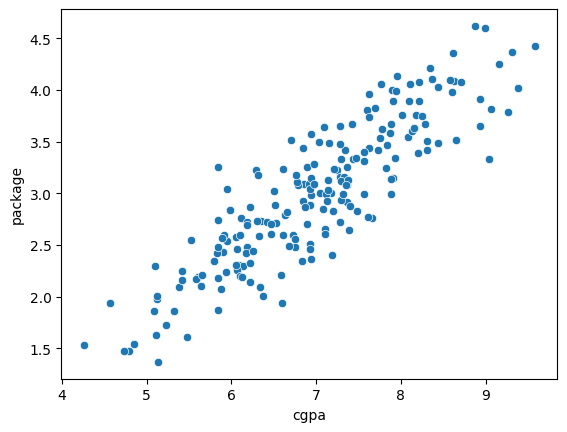

In [8]:
sns.scatterplot(data=df,x=df["cgpa"],y=df["package"])

In [9]:
#The data is kind of linear.

In [10]:
# In absulute error : MAE=sigma i=1 |yi-y^|/n
#it is robust for error.
#but it is hard to vectorise the grapgh at zero.

In [22]:
x=df[["cgpa"]]
y=df[["package"]]

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.2)

In [24]:
lr=LinearRegression()

In [25]:
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred=lr.predict(x_test)

In [28]:
print("MAE:",mean_absolute_error(y_pred,y_test))

MAE: 0.2884710931878175


Mean Squared Error.

In [30]:
#THE mean square error is just like Mean absolute error but here we are using Square instead of mode so that we can categorize the grapgh at zero.

In [31]:
print("MSE:",mean_squared_error(y_pred,y_test))

MSE: 0.12129235313495527


Root Mean Squared Error.

In [32]:
#NOW The root mean squared Error (RMSE). which do the same thing of MEAN absolute Error but with taking sqrt.

In [33]:
print("RMSE:",np.sqrt(mean_squared_error(y_pred,y_test)))

RMSE: 0.34827051717731616


r2_score      Formoula:1- SSr/SSm

In [34]:
# R2_SCORE
#Now the R2_score.Actually the r2 _score predict the best fit line error against mean line error. if our result is going toward best
#then i will go toward 1 side and vice versa for opposite side. if we get the negative value that mean our error is more worst then mean line error.

In [35]:
print("The r2_score is:",r2_score(y_pred,y_test))

The r2_score is: 0.6626575570753073


Adjusted r2_Score

In [36]:
#R2 score was good but there was a mistake eg if we have a data with colums cgpa|lpa but when we want to add more columns the r2 score would increase
# irrelevent columns/feature in case added the r2 score will remain constant or increase instead of decreasing to handle these type of case we have adjusted
#R2 sc0re
            #Formoula= 1-[[(1-r2)(n-1)]/(n-1-k)]
#where R2 mean in formoula simple r2 score
#n are the numbers mean how much studets etc data you have.
# k is nothing but independent columns. if cgpa is only input colum then k is 1 if increase k will also increase.


In [40]:
df1=df.copy()
df1["random_feature"]=np.random.random(200)

df1=df1[['cgpa','random_feature','package']]
df1

,cgpa,random_feature,package
0,6.89,0.280146,3.26
1,5.12,0.483447,1.98
2,7.82,0.682106,3.25
3,7.42,0.789254,3.67
4,6.94,0.235531,3.57
...,...,...,...
195,6.93,0.766352,2.46
196,5.89,0.324046,2.57
197,7.21,0.752937,3.24
198,7.63,0.072002,3.96


In [44]:
x=df1[["cgpa","random_feature"]].values
y=df1[["package"]].values

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [48]:
lr=LinearRegression()

In [49]:
lr.fit(x_train,y_train)

LinearRegression()

In [57]:
x_test.shape

(40, 2)

In [50]:
y_pred=lr.predict(x_test)

In [56]:
r2=r2_score(y_pred,y_test)

In [59]:
#Now adjusted r2
1-((1-r2)*(40-1)/(40-1-2))

0.6490796009382844

In [60]:
df2=df.copy()

In [61]:
df2["iq"]=df2["package"] + (np.random.randint(-12,12,200)/10)
df2=df2[["cgpa","iq","package"]]

In [62]:
df2.sample()

,cgpa,iq,package
10,5.32,1.16,1.86


In [64]:
x=df2[["cgpa","iq"]]
y=df2["package"]

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [66]:
lr=LinearRegression()

In [68]:
lr.fit(x_train,y_train)

LinearRegression()

In [70]:
y_pred=lr.predict(x_test)

In [72]:
r2=r2_score(y_pred,y_test)
r2

0.7008887189994233

In [73]:
#Now adjusted r2
1-((1-r2)*(40-1)/(40-1-2))

0.6847205416480409